In [ ]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Question 1


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




Number of edges in the graph: 88234
Number of nodes (vertices) in the graph: 4039
Is the graph connected? TRUE


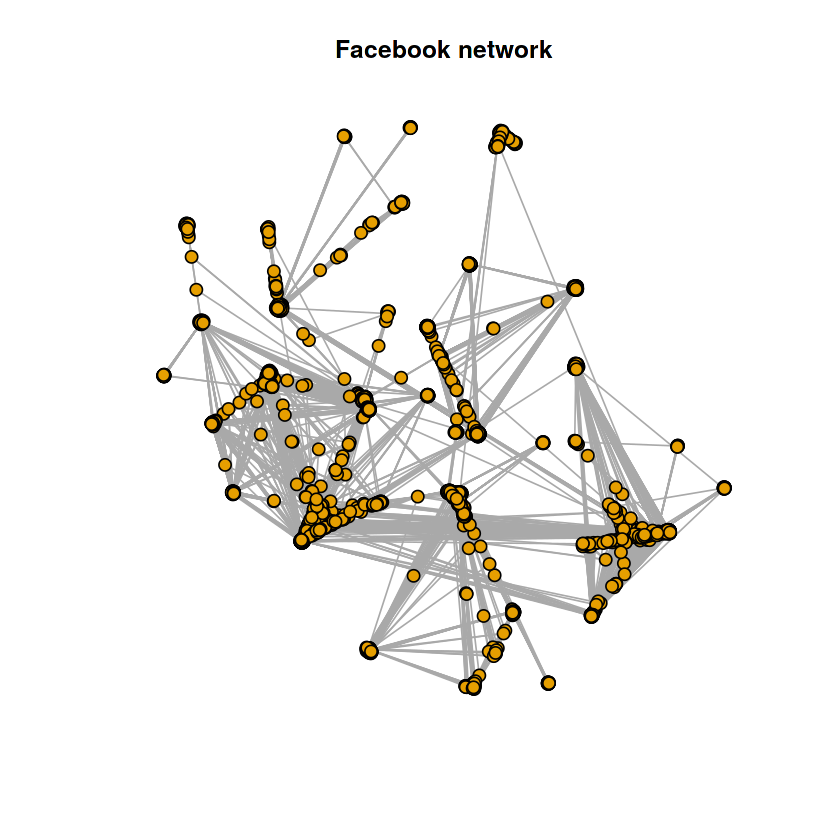

In [1]:
library('igraph')


facebook_txt <- read_graph("../input/facebook_combined.txt", directed = FALSE)
facebook_edge <- as_edgelist(facebook_txt)
g <- graph_from_edgelist(facebook_edge, directed = FALSE)
plot(g, edge.arrow.size=.2, vertex.size=4, vertex.label=NA, main="Facebook network")

#question 1.1
cat(paste('Number of edges in the graph: ', gsize(g), '\n', sep=''))
cat(paste('Number of nodes (vertices) in the graph: ', gorder(g), '\n', sep=''))

#question 1.2
cat(paste('Is the graph connected? ', is.connected(g), '\n', sep=''))


# Question 2

In [2]:
#diameter of network
cat(paste('Diameter of network: ', diameter(g), '\n', sep=''))


Diameter of network: 8


# Question 3

Average network degree:  43.6910126268878

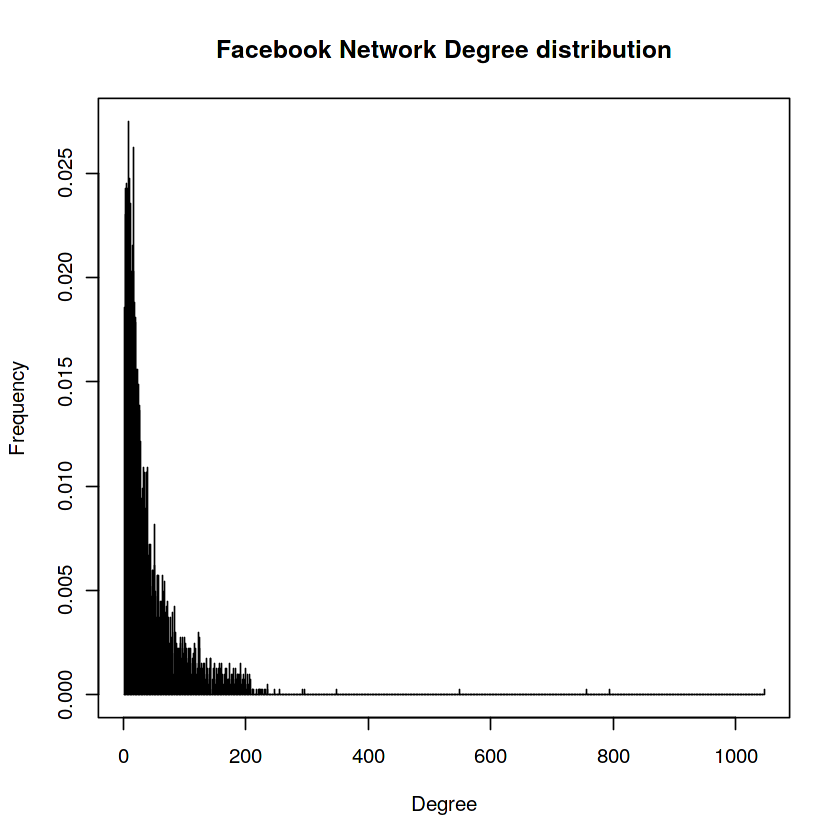

In [3]:
deg <- degree_distribution(g)

plot(deg, type="h", xlab = "Degree", ylab = "Frequency", main = 'Facebook Network Degree distribution')
cat(paste("Average network degree: ", mean(degree(g))))

# Question 4


Call:
lm(formula = deg_log ~ log_x)

Coefficients:
(Intercept)        log_x  
    -0.6611      -1.2475  


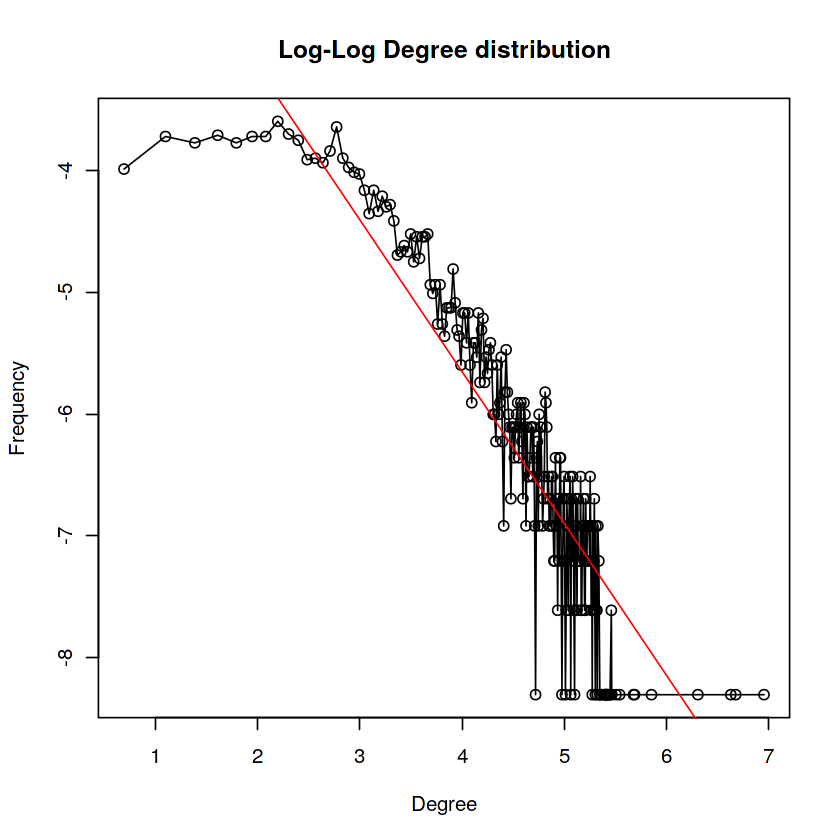

In [4]:
#x values
log_x <- log(c(1:length(deg)))
#y values
deg_log <- log(deg)

#adjust for log +/- infinity issues
log_x <- log_x[-which(is.infinite(deg_log))]
deg_log <- deg_log[-which(is.infinite(deg_log))]

plot(log_x, deg_log, type="o", xlab = "Degree", ylab = "Frequency", main = "Log-Log Degree distribution")

lm(deg_log ~ log_x)
abline(lm(deg_log ~ log_x), col='red')


# Question 5

Number of edges in the graph: 33690
Number of nodes (vertices) in the graph: 1519


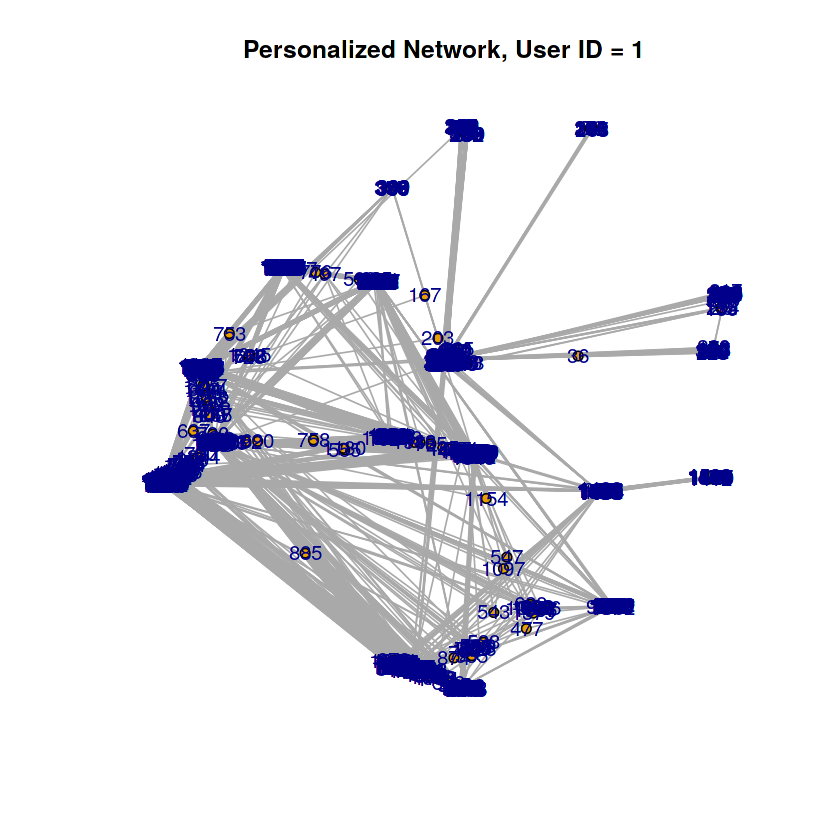

In [5]:
#edgelist ID 0 is graph ID 1
personal_g <- make_ego_graph(g, order=2, nodes=1)[[1]]


plot(personal_g, edge.arrow.size=.1, vertex.size=3, main='Personalized Network, User ID = 1')


cat(paste('Number of edges in the graph: ', gsize(personal_g), '\n', sep=''))
cat(paste('Number of nodes (vertices) in the graph: ', gorder(personal_g), '\n', sep=''))

# Question 6

In [6]:
#diameter of network
cat(paste('Diameter of network: ', diameter(personal_g), '\n', sep=''))
#trivial upper/lower bound?
#question 7 is theoretical

Diameter of network: 4


# Question 7 - in report

# Question 8

In [7]:
core_node_ID <- which(neighborhood.size(g,1,nodes=V(g))>200)

cat(paste('Number of core nodes in the Facebook Network: ', length(core_node_ID), '\n', sep=''))

# find the average degree of core nodes
average_deg <- mean(degree(g, v=V(g)[core_node_ID]))
cat(paste("Average degree of core nodes: ", average_deg, sep=''))

Number of core nodes in the Facebook Network: 41
Average degree of core nodes: 277.439024390244

# Question 9

In [ ]:
#node 1, 108, 349, 484, 1087
#cluster_fast_greedy, cluster_edge_betweenness, cluster_infomap

node_ids <- c(1, 108, 349, 484, 1087)
personal_g <- make_ego_graph(g, order=1, nodes=V(g)[node_ids])

fast_greed_colors <- c()
between_colors <- c()
infomap_colors <- c()

for (i in 5:5)
{
    cat('Node ID: ', node_ids[i], "\n")
    
    #fast greedy cluster
    fast_greed <- cluster_fast_greedy(personal_g[[i]])
    fast_greed_color <- fast_greed$membership + 1
    
    cat(paste('Fast Greedy Modularity: ', modularity(fast_greed), '\n', sep=''))
    plot(personal_g[[i]], mark.groups=groups(fast_greed), edge.arrow.size=.1, vertex.color=fast_greed_color,
    vertex.size=3,vertex.label=NA,
    main=paste('Community Structure - Fast-Greedy, core node ', node_ids[i], sep=''))
    
    #cluster edge b/t
    clust_edge <- cluster_edge_betweenness(personal_g[[i]])
    clust_edge_color <- clust_edge$membership + 1
    
    cat(paste('Cluster Edge Betweenness Modularity:', modularity(clust_edge), "\n", sep = ''))
    plot(personal_g[[i]], mark.groups=groups(clust_edge), edge.arrow.size=.1, vertex.color=clust_edge_color,
    vertex.size=3, vertex.label=NA,
    main=paste('Community Structure - Edge-Betweenness, core node ', node_ids[i],")",collapse=""))
    
    # 3 Cluster infomap
    clust_infomap <- cluster_infomap(personal_g[[i]])
    clust_infomap_color <- clust_infomap$membership + 1
    
    cat(paste('Cluster Infomap Modularity :', modularity(clust_infomap), "\n", sep=''))
    plot(personal_g[[i]], mark.groups=groups(clust_infomap), edge.arrow.size=.1, vertex.color=clust_infomap_color,
    vertex.size=3, vertex.label=NA,
    main=paste("Community Structure - Infomap, core node ", node_ids[i],")",collapse=""))
    cat("\n")
}

Node ID:  1087 
Fast Greedy Modularity: 0.145531499565493


In [ ]:

#node 1, 108, 349, 484, 1087

node_ids <- c(1)
personal_g <- make_ego_graph(g, order=1, nodes=V(g)[node_ids])

fast_greed_colors <- c()
between_colors <- c()
infomap_colors <- c()

cat('Node ID: ', node_ids, "\n")
    
#fast greedy cluster
fast_greed <- cluster_fast_greedy(personal_g[[1]])
fast_greed_color <- fast_greed$membership + 1
    
cat(paste('Fast Greedy Modularity: ', modularity(fast_greed), '\n', sep=''))
plot(personal_g[[1]], mark.groups=groups(fast_greed), edge.arrow.size=.1, vertex.color=fast_greed_color,
vertex.size=3,vertex.label=NA,
main=paste('Community Structure - Fast-Greedy, core node ', node_ids, sep=''))
    
#cluster edge b/t
clust_edge <- cluster_edge_betweenness(personal_g[[1]])
clust_edge_color <- clust_edge$membership + 1
    
cat(paste('Cluster Edge Betweenness Modularity:', modularity(clust_edge), "\n", sep = ''))
plot(personal_g[[1]], mark.groups=groups(clust_edge), edge.arrow.size=.1, vertex.color=clust_edge_color,
vertex.size=3, vertex.label=NA,
main=paste('Community Structure - Edge-Betweenness, core node ', node_ids,")",collapse=""))
    
# 3 Cluster infomap
clust_infomap <- cluster_infomap(personal_g[[1]])
clust_infomap_color <- clust_infomap$membership + 1
    
cat(paste('Cluster Infomap Modularity :', modularity(ic), "\n", sep=''))
plot(personal_g[[1]], mark.groups=groups(clust_infomap), edge.arrow.size=.1, vertex.color=clust_infomap_color,
vertex.size=3, vertex.label=NA,
main=paste("Community Structure - Infomap, core node ", node_ids, '\n', sep=''))


In [ ]:

#node 1, 108, 349, 484, 1087
node_ids <- c(108)
personal_g <- make_ego_graph(g, order=1, nodes=V(g)[node_ids])

fast_greed_colors <- c()
between_colors <- c()
infomap_colors <- c()

cat('Node ID: ', node_ids, "\n")
    
#fast greedy cluster
fast_greed <- cluster_fast_greedy(personal_g[[1]])
fast_greed_color <- fast_greed$membership + 1
    
cat(paste('Fast Greedy Modularity: ', modularity(fast_greed), '\n', sep=''))
plot(personal_g[[1]], mark.groups=groups(fast_greed), edge.arrow.size=.1, vertex.color=fast_greed_color,
vertex.size=3,vertex.label=NA,
main=paste('Community Structure - Fast-Greedy, core node ', node_ids, sep=''))
    
#cluster edge b/t
clust_edge <- cluster_edge_betweenness(personal_g[[1]])
clust_edge_color <- clust_edge$membership + 1
    
cat(paste('Cluster Edge Betweenness Modularity:', modularity(clust_edge), "\n", sep = ''))
plot(personal_g[[1]], mark.groups=groups(clust_edge), edge.arrow.size=.1, vertex.color=clust_edge_color,
vertex.size=3, vertex.label=NA,
main=paste('Community Structure - Edge-Betweenness, core node ', node_ids,")",collapse=""))
    
# 3 Cluster infomap
clust_infomap <- cluster_infomap(personal_g[[1]])
clust_infomap_color <- clust_infomap$membership + 1
    
cat(paste('Cluster Infomap Modularity :', modularity(ic), "\n", sep=''))
plot(personal_g[[1]], mark.groups=groups(clust_infomap), edge.arrow.size=.1, vertex.color=clust_infomap_color,
vertex.size=3, vertex.label=NA,
main=paste("Community Structure - Infomap, core node ", node_ids, '\n', sep=''))


In [ ]:

#node 1, 108, 349, 484, 1087
node_ids <- c(349)
personal_g <- make_ego_graph(g, order=1, nodes=V(g)[node_ids])

fast_greed_colors <- c()
between_colors <- c()
infomap_colors <- c()

cat('Node ID: ', node_ids, "\n")
    
#fast greedy cluster
fast_greed <- cluster_fast_greedy(personal_g[[1]])
fast_greed_color <- fast_greed$membership + 1
    
cat(paste('Fast Greedy Modularity: ', modularity(fast_greed), '\n', sep=''))
plot(personal_g[[1]], mark.groups=groups(fast_greed), edge.arrow.size=.1, vertex.color=fast_greed_color,
vertex.size=3,vertex.label=NA,
main=paste('Community Structure - Fast-Greedy, core node ', node_ids, sep=''))
    
#cluster edge b/t
clust_edge <- cluster_edge_betweenness(personal_g[[1]])
clust_edge_color <- clust_edge$membership + 1
    
cat(paste('Cluster Edge Betweenness Modularity:', modularity(clust_edge), "\n", sep = ''))
plot(personal_g[[1]], mark.groups=groups(clust_edge), edge.arrow.size=.1, vertex.color=clust_edge_color,
vertex.size=3, vertex.label=NA,
main=paste('Community Structure - Edge-Betweenness, core node ', node_ids,")",collapse=""))
    
# 3 Cluster infomap
clust_infomap <- cluster_infomap(personal_g[[1]])
clust_infomap_color <- clust_infomap$membership + 1
    
cat(paste('Cluster Infomap Modularity :', modularity(ic), "\n", sep=''))
plot(personal_g[[1]], mark.groups=groups(clust_infomap), edge.arrow.size=.1, vertex.color=clust_infomap_color,
vertex.size=3, vertex.label=NA,
main=paste("Community Structure - Infomap, core node ", node_ids, '\n', sep=''))


In [ ]:

#node 1, 108, 349, 484, 1087
node_ids <- c(484)
personal_g <- make_ego_graph(g, order=1, nodes=V(g)[node_ids])

fast_greed_colors <- c()
between_colors <- c()
infomap_colors <- c()

cat('Node ID: ', node_ids, "\n")
    
#fast greedy cluster
fast_greed <- cluster_fast_greedy(personal_g[[1]])
fast_greed_color <- fast_greed$membership + 1
    
cat(paste('Fast Greedy Modularity: ', modularity(fast_greed), '\n', sep=''))
plot(personal_g[[1]], mark.groups=groups(fast_greed), edge.arrow.size=.1, vertex.color=fast_greed_color,
vertex.size=3,vertex.label=NA,
main=paste('Community Structure - Fast-Greedy, core node ', node_ids, sep=''))
    
#cluster edge b/t
clust_edge <- cluster_edge_betweenness(personal_g[[1]])
clust_edge_color <- clust_edge$membership + 1
    
cat(paste('Cluster Edge Betweenness Modularity:', modularity(clust_edge), "\n", sep = ''))
plot(personal_g[[1]], mark.groups=groups(clust_edge), edge.arrow.size=.1, vertex.color=clust_edge_color,
vertex.size=3, vertex.label=NA,
main=paste('Community Structure - Edge-Betweenness, core node ', node_ids,")",collapse=""))
    
# 3 Cluster infomap
clust_infomap <- cluster_infomap(personal_g[[1]])
clust_infomap_color <- clust_infomap$membership + 1
    
cat(paste('Cluster Infomap Modularity :', modularity(ic), "\n", sep=''))
plot(personal_g[[1]], mark.groups=groups(clust_infomap), edge.arrow.size=.1, vertex.color=clust_infomap_color,
vertex.size=3, vertex.label=NA,
main=paste("Community Structure - Infomap, core node ", node_ids, '\n', sep=''))


In [ ]:

#node 1, 108, 349, 484, 1087
node_ids <- c(1087)
personal_g <- make_ego_graph(g, order=1, nodes=V(g)[node_ids])

fast_greed_colors <- c()
between_colors <- c()
infomap_colors <- c()

cat('Node ID: ', node_ids, "\n")
    
#fast greedy cluster
fast_greed <- cluster_fast_greedy(personal_g[[1]])
fast_greed_color <- fast_greed$membership + 1
    
cat(paste('Fast Greedy Modularity: ', modularity(fast_greed), '\n', sep=''))
plot(personal_g[[1]], mark.groups=groups(fast_greed), edge.arrow.size=.1, vertex.color=fast_greed_color,
vertex.size=3,vertex.label=NA,
main=paste('Community Structure - Fast-Greedy, core node ', node_ids, sep=''))
    
#cluster edge b/t
clust_edge <- cluster_edge_betweenness(personal_g[[1]])
clust_edge_color <- clust_edge$membership + 1
    
cat(paste('Cluster Edge Betweenness Modularity:', modularity(clust_edge), "\n", sep = ''))
plot(personal_g[[1]], mark.groups=groups(clust_edge), edge.arrow.size=.1, vertex.color=clust_edge_color,
vertex.size=3, vertex.label=NA,
main=paste('Community Structure - Edge-Betweenness, core node ', node_ids,")",collapse=""))
    
# 3 Cluster infomap
clust_infomap <- cluster_infomap(personal_g[[1]])
clust_infomap_color <- clust_infomap$membership + 1
    
cat(paste('Cluster Infomap Modularity :', modularity(ic), "\n", sep=''))
plot(personal_g[[1]], mark.groups=groups(clust_infomap), edge.arrow.size=.1, vertex.color=clust_infomap_color,
vertex.size=3, vertex.label=NA,
main=paste("Community Structure - Infomap, core node ", node_ids, '\n', sep=''))


# Question 10

Node ID:  1 
Fast Greedy Modularity: 0.44185326886839
Cluster Edge Betweenness Modularity:0.41614614203983


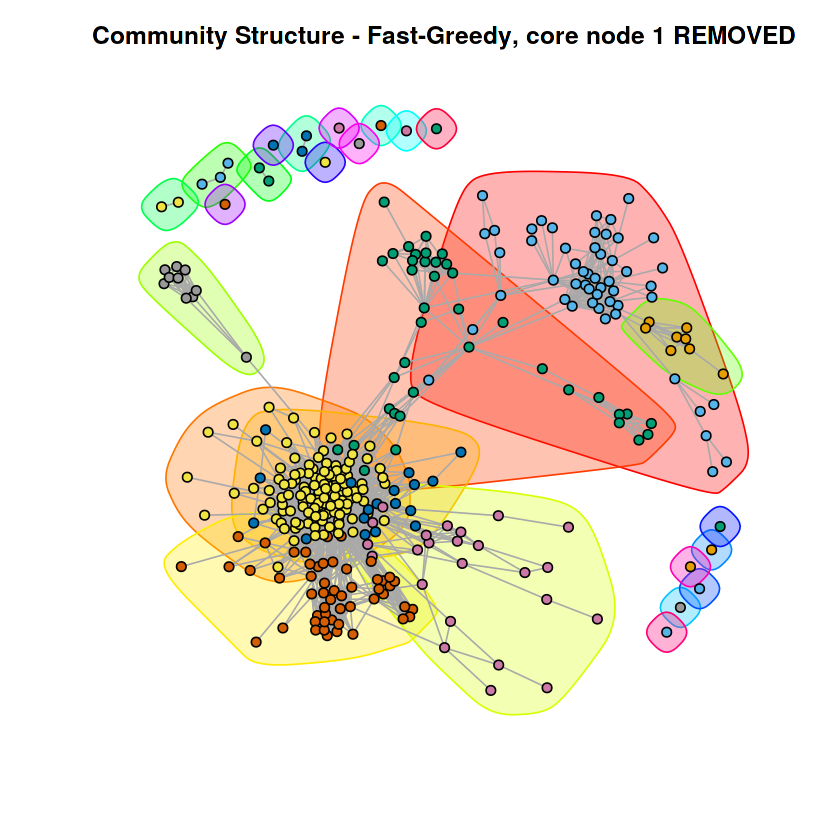

ERROR: Error in modularity(ic): object 'ic' not found


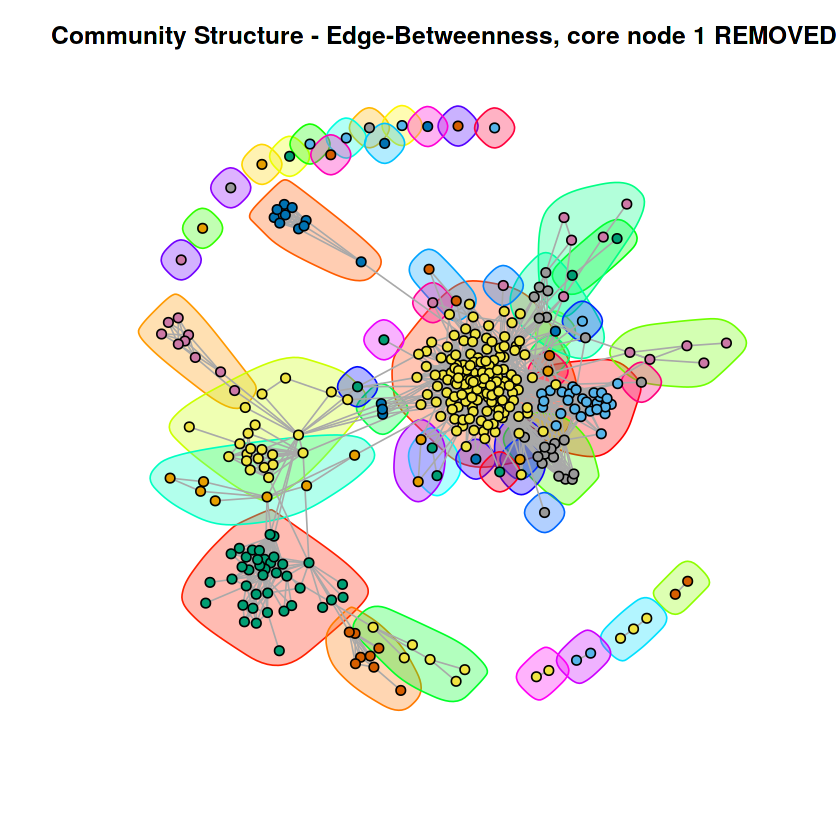

In [9]:

#node 1, 108, 349, 484, 1087
node_ids <- c(1)
personal_g <- make_ego_graph(g, order=1, nodes=V(g)[node_ids])
personal_g[[1]] <- delete_vertices(personal_g[[1]], toString(node_ids))

fast_greed_colors <- c()
between_colors <- c()
infomap_colors <- c()

cat('Node ID: ', node_ids, "\n")
    
#fast greedy cluster
fast_greed <- cluster_fast_greedy(personal_g[[1]])
fast_greed_color <- fast_greed$membership + 1
    
cat(paste('Fast Greedy Modularity: ', modularity(fast_greed), '\n', sep=''))
plot(personal_g[[1]], mark.groups=groups(fast_greed), edge.arrow.size=.1, vertex.color=fast_greed_color,
vertex.size=3,vertex.label=NA,
main=paste('Community Structure - Fast-Greedy, core node ', node_ids, ' REMOVED', '\n', sep=''))
    
#cluster edge b/t
clust_edge <- cluster_edge_betweenness(personal_g[[1]])
clust_edge_color <- clust_edge$membership + 1
    
cat(paste('Cluster Edge Betweenness Modularity:', modularity(clust_edge), "\n", sep = ''))
plot(personal_g[[1]], mark.groups=groups(clust_edge), edge.arrow.size=.1, vertex.color=clust_edge_color,
vertex.size=3, vertex.label=NA,
main=paste('Community Structure - Edge-Betweenness, core node ', node_ids, ' REMOVED', '\n', sep=''))
    
# 3 Cluster infomap
clust_infomap <- cluster_infomap(personal_g[[1]])
clust_infomap_color <- clust_infomap$membership + 1
    
cat(paste('Cluster Infomap Modularity :', modularity(clust_infomap), "\n", sep=''))
plot(personal_g[[1]], mark.groups=groups(clust_infomap), edge.arrow.size=.1, vertex.color=clust_infomap_color,
vertex.size=3, vertex.label=NA,
main=paste("Community Structure - Infomap, core node ", node_ids, ' REMOVED', '\n', sep=''))



In [ ]:

#node 1, 108, 349, 484, 1087
node_ids <- c(108)
personal_g <- make_ego_graph(g, order=1, nodes=V(g)[node_ids])
personal_g[[1]] <- delete_vertices(personal_g[[1]], toString(node_ids))

fast_greed_colors <- c()
between_colors <- c()
infomap_colors <- c()

cat('Node ID: ', node_ids, "\n")
    
#fast greedy cluster
fast_greed <- cluster_fast_greedy(personal_g[[1]])
fast_greed_color <- fast_greed$membership + 1
    
cat(paste('Fast Greedy Modularity: ', modularity(fast_greed), '\n', sep=''))
plot(personal_g[[1]], mark.groups=groups(fast_greed), edge.arrow.size=.1, vertex.color=fast_greed_color,
vertex.size=3,vertex.label=NA,
main=paste('Community Structure - Fast-Greedy, core node ', node_ids, ' REMOVED', '\n', sep=''))
    
#cluster edge b/t
clust_edge <- cluster_edge_betweenness(personal_g[[1]])
clust_edge_color <- clust_edge$membership + 1
    
cat(paste('Cluster Edge Betweenness Modularity:', modularity(clust_edge), "\n", sep = ''))
plot(personal_g[[1]], mark.groups=groups(clust_edge), edge.arrow.size=.1, vertex.color=clust_edge_color,
vertex.size=3, vertex.label=NA,
main=paste('Community Structure - Edge-Betweenness, core node ', node_ids, ' REMOVED', '\n',sep=''))
    
# 3 Cluster infomap
clust_infomap <- cluster_infomap(personal_g[[1]])
clust_infomap_color <- clust_infomap$membership + 1
    
cat(paste('Cluster Infomap Modularity :', modularity(clust_infomap), "\n", sep=''))
plot(personal_g[[1]], mark.groups=groups(clust_infomap), edge.arrow.size=.1, vertex.color=clust_infomap_color,
vertex.size=3, vertex.label=NA,
main=paste("Community Structure - Infomap, core node ", node_ids,  ' REMOVED', '\n', sep=''))



In [ ]:

#node 1, 108, 349, 484, 1087
node_ids <- c(349)
personal_g <- make_ego_graph(g, order=1, nodes=V(g)[node_ids])
personal_g[[1]] <- delete_vertices(personal_g[[1]], toString(node_ids))

fast_greed_colors <- c()
between_colors <- c()
infomap_colors <- c()

cat('Node ID: ', node_ids, "\n")
    
#fast greedy cluster
fast_greed <- cluster_fast_greedy(personal_g[[1]])
fast_greed_color <- fast_greed$membership + 1
    
cat(paste('Fast Greedy Modularity: ', modularity(fast_greed), '\n', sep=''))
plot(personal_g[[1]], mark.groups=groups(fast_greed), edge.arrow.size=.1, vertex.color=fast_greed_color,
vertex.size=3,vertex.label=NA,
main=paste('Community Structure - Fast-Greedy, core node ', node_ids,'REMOVED', '\n', sep=''))
    
#cluster edge b/t
clust_edge <- cluster_edge_betweenness(personal_g[[1]])
clust_edge_color <- clust_edge$membership + 1
    
cat(paste('Cluster Edge Betweenness Modularity:', modularity(clust_edge), "\n", sep = ''))
plot(personal_g[[1]], mark.groups=groups(clust_edge), edge.arrow.size=.1, vertex.color=clust_edge_color,
vertex.size=3, vertex.label=NA,
main=paste('Community Structure - Edge-Betweenness, core node ', node_ids,'REMOVED', '\n', sep=''))
    
# 3 Cluster infomap
clust_infomap <- cluster_infomap(personal_g[[1]])
clust_infomap_color <- clust_infomap$membership + 1
    
cat(paste('Cluster Infomap Modularity :', modularity(clust_infomap), "\n", sep=''))
plot(personal_g[[1]], mark.groups=groups(clust_infomap), edge.arrow.size=.1, vertex.color=clust_infomap_color,
vertex.size=3, vertex.label=NA,
main=paste('Community Structure - Infomap, core node ', node_ids, ' REMOVED', '\n', sep=''))



In [ ]:

#node 1, 108, 349, 484, 1087
node_ids <- c(484)
personal_g <- make_ego_graph(g, order=1, nodes=V(g)[node_ids])
personal_g[[1]] <- delete_vertices(personal_g[[1]], toString(node_ids))

fast_greed_colors <- c()
between_colors <- c()
infomap_colors <- c()

cat('Node ID: ', node_ids, "\n")
    
#fast greedy cluster
fast_greed <- cluster_fast_greedy(personal_g[[1]])
fast_greed_color <- fast_greed$membership + 1
    
cat(paste('Fast Greedy Modularity: ', modularity(fast_greed), '\n', sep=''))
plot(personal_g[[1]], mark.groups=groups(fast_greed), edge.arrow.size=.1, vertex.color=fast_greed_color,
vertex.size=3,vertex.label=NA,
main=paste('Community Structure - Fast-Greedy, core node ', node_ids, ' REMOVED', '\n', sep=''))
    
#cluster edge b/t
clust_edge <- cluster_edge_betweenness(personal_g[[1]])
clust_edge_color <- clust_edge$membership + 1
    
cat(paste('Cluster Edge Betweenness Modularity:', modularity(clust_edge), "\n", sep = ''))
plot(personal_g[[1]], mark.groups=groups(clust_edge), edge.arrow.size=.1, vertex.color=clust_edge_color,
vertex.size=3, vertex.label=NA,
main=paste('Community Structure - Edge-Betweenness, core node ', node_ids, ' REMOVED', '\n,' sep=''))
    
# 3 Cluster infomap
clust_infomap <- cluster_infomap(personal_g[[1]])
clust_infomap_color <- clust_infomap$membership + 1
    
cat(paste('Cluster Infomap Modularity :', modularity(clust_infomap), "\n", sep=''))
plot(personal_g[[1]], mark.groups=groups(clust_infomap), edge.arrow.size=.1, vertex.color=clust_infomap_color,
vertex.size=3, vertex.label=NA,
main=paste("Community Structure - Infomap, core node ", node_ids, ' REMOVED,' '\n', sep=''))



In [ ]:

#node 1, 108, 349, 484, 1087
node_ids <- c(1087)
personal_g <- make_ego_graph(g, order=1, nodes=V(g)[node_ids])
personal_g[[1]] <- delete_vertices(personal_g[[1]], toString(node_ids))

fast_greed_colors <- c()
between_colors <- c()
infomap_colors <- c()

cat('Node ID: ', node_ids, "\n")
    
#fast greedy cluster
fast_greed <- cluster_fast_greedy(personal_g[[1]])
fast_greed_color <- fast_greed$membership + 1
    
cat(paste('Fast Greedy Modularity: ', modularity(fast_greed), '\n', sep=''))
plot(personal_g[[1]], mark.groups=groups(fast_greed), edge.arrow.size=.1, vertex.color=fast_greed_color,
vertex.size=3,vertex.label=NA,
main=paste('Community Structure - Fast-Greedy, core node ', node_ids,' REMOVED', '\n', sep=''))
    
#cluster edge b/t
clust_edge <- cluster_edge_betweenness(personal_g[[1]])
clust_edge_color <- clust_edge$membership + 1
    
cat(paste('Cluster Edge Betweenness Modularity:', modularity(clust_edge), "\n", sep = ''))
plot(personal_g[[1]], mark.groups=groups(clust_edge), edge.arrow.size=.1, vertex.color=clust_edge_color,
vertex.size=3, vertex.label=NA,
main=paste('Community Structure - Edge-Betweenness, core node ', node_ids,' REMOVED', '\n', sep=''))
    
# 3 Cluster infomap
clust_infomap <- cluster_infomap(personal_g[[1]])
clust_infomap_color <- clust_infomap$membership + 1
    
cat(paste('Cluster Infomap Modularity :', modularity(clust_infomap), "\n", sep=''))
plot(personal_g[[1]], mark.groups=groups(clust_infomap), edge.arrow.size=.1, vertex.color=clust_infomap_color,
vertex.size=3, vertex.label=NA,
main=paste("Community Structure - Infomap, core node ", node_ids, ' REMOVED', '\n', sep=''))



# Question 11 - in report

# Question 12 